In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import (t, f, norm, ttest_ind)

In [112]:
data = pd.read_csv("../data/nhanes_2015_2016.csv", usecols = ["SMQ020", "RIAGENDR", "DMDCITZN", "RIDAGEYR", "BPXSY1"]).dropna(axis = 0)

In [113]:
data.isna().sum(axis = 0)

SMQ020      0
RIAGENDR    0
RIDAGEYR    0
DMDCITZN    0
BPXSY1      0
dtype: int64

In [114]:
ssize = data.shape[0]
ssize

5400

# __Population proportion.__
----------------------

In [141]:
# Null hypothesis: Population proportion of smokers in 0.4
# Alternative hypothesis: Population proportion of smokers is not 0.4

In [142]:
data.SMQ020.unique()

array([1, 2, 7, 9], dtype=int64)

In [143]:
# best estimate, sample proportion of smokers.

best_est = (data.SMQ020 == 1).mean()
best_est

0.4083333333333333

In [144]:
# estimated standard error

stderr_null = np.sqrt((0.4 * (1 - 0.4)) / ssize)
stderr_null

0.006666666666666666

In [145]:
# test statistic

zstat = (best_est - 0.4) / stderr_null
zstat

1.2499999999999956

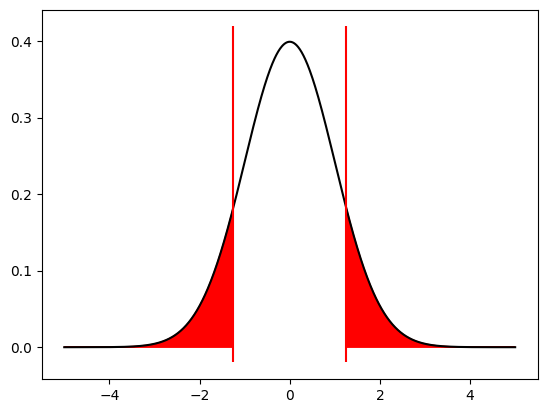

In [146]:
x = np.linspace(-5, 5, num = 1000)
zpdfs = norm.pdf(x)

fig, axes = plt.subplots()
axes.plot(x, zpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-zstat, zstat], ymin = ymin, ymax = ymax, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = zpdfs, where = (x <= -zstat) | (x >= zstat), color = "red")
plt.show()

In [147]:
norm.cdf(zstat)

0.894350226333144

In [148]:
norm.cdf(-zstat)

0.10564977366685607

In [149]:
# WOW!

norm.cdf(-zstat) + norm.cdf(zstat)

1.0

In [150]:
p = 2 * (1 - norm.cdf(zstat))
p

0.21129954733371203

In [151]:
# p value here is very larger compared to the significance level of 0.05
# So, we cannot reject the Null hypothesis,
# We have enough evidence to claim that the population proportion of smokers is indeed 0.40

# __Difference in Population Proportions__
---------------

In [152]:
# Is the proportions of male and female smokers different, for people between 20 - 25 years old age?

# Null hypothesis: The population proportion of male and female smokers are identical.
# Alternative hypothesis: The population proportion of male and female smokers are different.

In [153]:
# our best estimate is the difference between the proportions of male and female smokers in the samples.

males = data.SMQ020[(data.RIAGENDR == 1) & (data.RIDAGEYR <= 25) & (data.RIDAGEYR >= 20)]
females = data.SMQ020[(data.RIAGENDR == 2) & (data.RIDAGEYR <= 25) & (data.RIDAGEYR >= 20)]

In [154]:
prop_m = (males == 1).mean()
prop_f = (females == 1).mean()

prop_m, prop_f

(0.33613445378151263, 0.25098039215686274)

In [155]:
males.size, females.size

(238, 255)

In [156]:
# best estimate

prop_diff = prop_m - prop_f
prop_diff

0.08515406162464989

In [157]:
# estimated standard error for the Null hypothesis,

males.var(), females.var()

(0.22408963585434172, 0.3947197776748495)

In [158]:
# We'll use the unpooled approach, since the variances vary largely.

stderr_m = np.sqrt(prop_m * (1 - prop_m) / males.size)
stderr_f = np.sqrt(prop_f * (1 - prop_f) / females.size)

stderr_m, stderr_f

(0.0306202055250635, 0.02715166083170966)

In [159]:
stderr_comb = stderr_m + stderr_f
stderr_comb

0.05777186635677316

In [160]:
# test statistic

zstat = (prop_diff - 0) / stderr_comb
zstat

1.4739711038375767

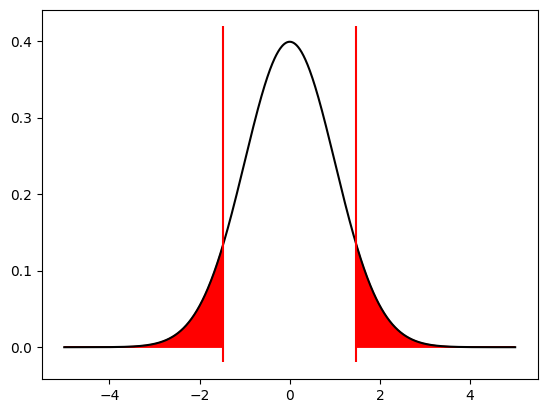

In [161]:
x = np.linspace(-5, 5, num = 1000)
zpdfs = norm.pdf(x)

fig, axes = plt.subplots()
axes.plot(x, zpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-zstat, zstat], ymin = ymin, ymax = ymax, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = zpdfs, where = (x <= -zstat) | (x >= zstat), color = "red")
plt.show()

In [162]:
# p values

p = 2 * (1 - norm.cdf(zstat))
p

0.14048937151175878

In [163]:
df_pooled = males.size + females.size - 2

2 * (1 - t.cdf(zstat, df = df_pooled))

0.14113019985812159

In [164]:
# Our p value is greater than the significance level @ 0.05,
# So, we cannot reject the Null hypothesis.

# There's enough evidence to claim that the population proportion of male and female smokers between 20 - 25 years of age are identical.

# __Population Means__
-----------------

In [165]:
# Let's consider the population mean of blood pressure of males.

males = data.BPXSY1[data.RIAGENDR == 1]

ssize = males.size
best_est = males.mean()

best_est, ssize

(126.99885539870279, 2621)

In [169]:
# Null hypothesis: The mean blood pressure for the male population is 126
# Alternative hypothesis: Mean blood pressure for the male population is not 126

In [170]:
# estimated standard error,

stderr_null = males.std() / np.sqrt(ssize)
stderr_null

0.344608481193278

In [171]:
# test statistic,

tstat = (best_est - 126) / stderr_null
tstat

2.898522390522845

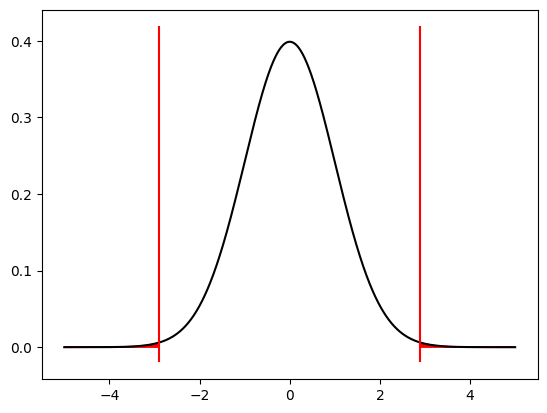

In [173]:
x = np.linspace(-5, 5, num = 1000)
tpdfs = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
axes.plot(x, tpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-tstat, tstat], ymin = ymin, ymax = ymax, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = tpdfs, where = (x <= -tstat) | (x >= tstat), color = "red")
plt.show()

In [175]:
p = 2 * (1 - t.cdf(tstat, df = ssize - 1))
p

0.003780409194792611

In [176]:
# The p value here is smaller than our significance level of 0.05
# So, we can reject the Null hypothesis.

# There's enough evidence to assert that the mean blood pressure of the male population is not 126!

# __Difference in Population Means__
----------------

In [177]:
# Is there a significant diffeernce in the blood pressures of male and females?

males = data.BPXSY1[data.RIAGENDR == 1]
females = data.BPXSY1[data.RIAGENDR == 2]

In [178]:
# best estimate is the difference in the mean blood pressures of male and females in sample 

best_est = males.mean() - females.mean()
best_est

3.7156600046761525

In [179]:
# Null hypothesis: No significant differences between the mean blood pressures of male and female populations.
# Alternative hypothesis: There is a significant difference between the mean blood pressures of male and female populations.

In [180]:
# estimated standard errors,

males.var(), females.var()

(311.2568689183955, 363.604076754824)

In [181]:
# We definetely cannot use the pooled approach!
# Switching back to the unpooled approach,

stderr_m = males.std() / np.sqrt(males.size)
stderr_f = females.std() / np.sqrt(females.size)

stderr_unpooled = stderr_m + stderr_f
stderr_unpooled

0.7063264626050167

In [182]:
# test statistic,

tstat = (best_est - 0) / stderr_unpooled
tstat

5.260541975126279

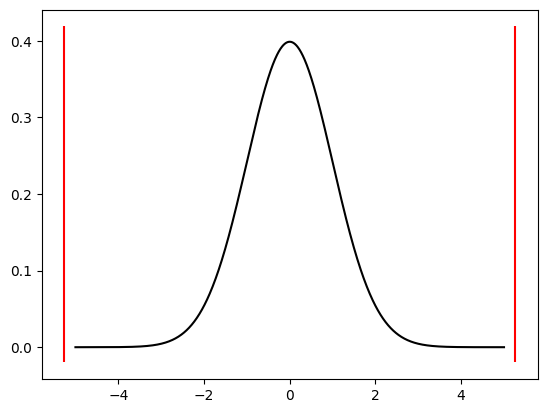

In [184]:
x = np.linspace(-5, 5, num = 1000)
tpdfs = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
axes.plot(x, tpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-tstat, tstat], ymin = ymin, ymax = ymax, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = tpdfs, where = (x <= -tstat) | (x >= tstat), color = "red")
plt.show()

In [187]:
df = min(males.size, females.size) - 1
p = 2 * (1 - t.cdf(tstat, df = df))
p

1.552432362661449e-07

In [188]:
# somewhat ingenuine.

df_pooled = males.size + females.size - 2

p = 2 * (1 - t.cdf(tstat, df = df_pooled))
p

1.491746723925047e-07

In [189]:
# The difference is not that great, though!

In [190]:
# p values are extremely small compared to the significance levels of 0.05,
# So, we can reject the Null hypothesis.

# There's enough evidence to claim that the mean blood pressures of male and female populations are not the same.

## ___Heteroscedasticity___
-------------

In [199]:
# Heteroscedasticity is a phenomenon where the standard deviations of values within specific windows of a variable are inconsisitent.

np.sort(data.RIDAGEYR.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], dtype=int64)

In [204]:
lims = np.linspace(18, 80, num = 11, dtype = np.int64)
lims

array([18, 24, 30, 36, 42, 49, 55, 61, 67, 73, 80], dtype=int64)

In [206]:
data.loc[:, "range_index"] = pd.cut(data.RIDAGEYR, lims)

In [214]:
data.groupby(["range_index", "RIAGENDR"]).agg({"BPXSY1": np.std, "RIAGENDR": np.size})

BPXSY1  RIAGENDR
range_index RIAGENDR                     
(18, 24]    1         10.204629       259
            2         10.312487       257
(24, 30]    1         10.635062       254
            2         10.581168       317
(30, 36]    1         12.975654       279
            2         11.759301       270
(36, 42]    1         13.350923       237
            2         13.319370       258
(42, 49]    1         16.896505       261
            2         15.553396       334
(49, 55]    1         18.209776       259
            2         17.157678       273
(55, 61]    1         18.819552       267
            2         20.244446       259
(61, 67]    1         19.034608       246
            2         17.483564       247
(67, 73]    1         20.298790       204
            2         19.667638       191
(73, 80]    1         20.225837       295
            2         21.059872       306

In [215]:
data.groupby(["range_index", "RIAGENDR"]).agg({"BPXSY1": np.std, "RIAGENDR": np.size}).unstack()

BPXSY1            RIAGENDR     
RIAGENDR             1          2        1    2
range_index                                    
(18, 24]     10.204629  10.312487      259  257
(24, 30]     10.635062  10.581168      254  317
(30, 36]     12.975654  11.759301      279  270
(36, 42]     13.350923  13.319370      237  258
(42, 49]     16.896505  15.553396      261  334
(49, 55]     18.209776  17.157678      259  273
(55, 61]     18.819552  20.244446      267  259
(61, 67]     19.034608  17.483564      246  247
(67, 73]     20.298790  19.667638      204  191
(73, 80]     20.225837  21.059872      295  306